In [40]:
import numpy as np
import pandas as pd
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
import gensim
import string

import pandas as pd
import numpy as np
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix

from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))

import re
from nltk.tokenize import word_tokenize
import gensim
import string

from tqdm import tqdm
from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

In [7]:
tweet = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [8]:
print('There are {} rows and {} columns in train'.format(tweet.shape[0],tweet.shape[1]))
print('There are {} rows and {} columns in test'.format(test.shape[0],test.shape[1]))

There are 7613 rows and 5 columns in train
There are 3263 rows and 4 columns in test


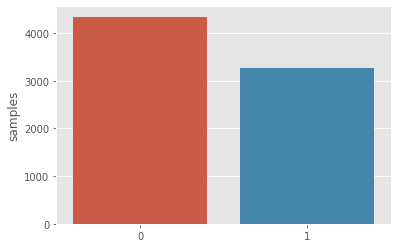

In [9]:

x=tweet.target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')
plt.show()

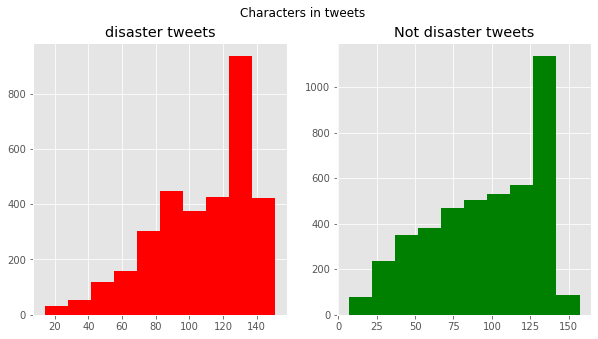

In [10]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=tweet[tweet['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=tweet[tweet['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

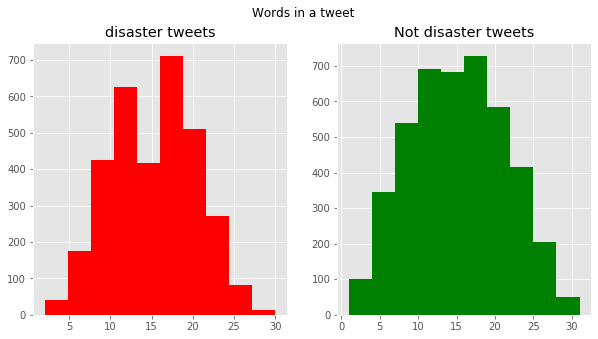

In [11]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=tweet[tweet['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=tweet[tweet['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()

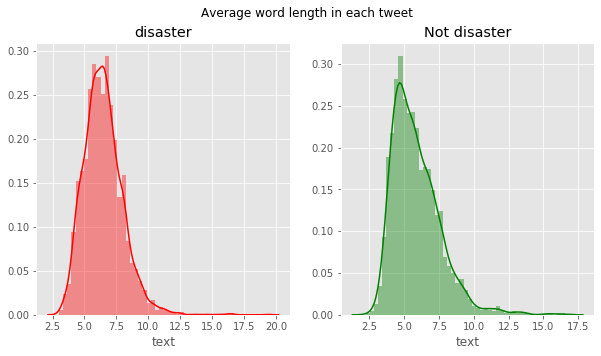

In [12]:

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=tweet[tweet['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('disaster')
word=tweet[tweet['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')
plt.show()

In [13]:
df = tweet
df

id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...       1  
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1  
7611  Police investigating after an e-bike collided ...       1  
7612  The Latest: More Homes Razed by Northern Calif...       1  

[7613 rows x 5 columns]

In [14]:

df=pd.concat([tweet,test])
df.shape
df

C:\Users\vaibhav.maheshwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


id keyword location  target  \
0         1     NaN      NaN     1.0   
1         4     NaN      NaN     1.0   
2         5     NaN      NaN     1.0   
3         6     NaN      NaN     1.0   
4         7     NaN      NaN     1.0   
...     ...     ...      ...     ...   
3258  10861     NaN      NaN     NaN   
3259  10865     NaN      NaN     NaN   
3260  10868     NaN      NaN     NaN   
3261  10874     NaN      NaN     NaN   
3262  10875     NaN      NaN     NaN   

                                                   text  
0     Our Deeds are the Reason of this #earthquake M...  
1                Forest fire near La Ronge Sask. Canada  
2     All residents asked to 'shelter in place' are ...  
3     13,000 people receive #wildfires evacuation or...  
4     Just got sent this photo from Ruby #Alaska as ...  
...                                                 ...  
3258  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...  
3259  Storm in RI worse than last hurricane. My city...  
3260  Green Line derailment in Chicago http://t.co/U...  
3261  MEG issues Hazardous Weather Outlook (HWO) htt...  
3262  #CityofCalgary has activated its Municipal Eme...  

[10876 rows x 5 columns]

In [15]:
#Clean the text by converting to lowercase, remove digits, special chars
def cleantext(col):
    df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
    df['text'] = df['text'].apply(lambda x: ''.join([i for i in str(x) if not i.isdigit()]))
    df['text'] = df['text'].str.replace('[^\w\s]','')
    df['text'] = df['text'].str.replace("$",'')
    df['text'] = df['text'].str.replace( "[^\x00-\x7A]",'')
    df['text'] = df['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
    df['text'] = df['text'].apply(lambda x: " ".join(x for x in str(x).split() if x.startswith("http") == False))
    return col 
cleantext(df)
df['text'].head(5)

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    people receive wildfires evacuation orders in ...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [16]:
# Remove stop words

stop = stopwords.words('english')

l = ['inc','plc','via','inc','could','ltd','im','fyi,','th','ltd','im','st','k','were','u','v','dont','were','mr','it','vs', 
'cant','de','pm','yr','th','td','dot','llc','sa','per','nd','ill','lp','ur','pls','dear','g','hi','lets','ex','ok','cc','wont',
'ok','yeah','id','ups','i','if','couldnt','its','wont','itll','incs','fyi','llc','fyi','via','llc','dear','dear','pls','via',
'llc','via','couldve','couldnt','fyi','dear','via','via','via','fyi','dear','via','fyi','fyii','fyimore','fyi','fyi','dear',
'wont','sm','via','via','via','fyi', 'rt', 'qt', 'like', 'ago', 'ca', 'fcc', 'use', 'know', 'two', 'good', 'feel', 'call',
'sure', 'open', 'say', 'att', 'mean', 'pm', 'lot', 'due', 'titi', 'th', 'cee', 'etf', 'co', 'ga', 'esg', 'fee', 'ar','bn', 'fm',
'cp','go', 'u', 'im', 'r', 'x', 'ai','ivz', 'lol','btc', 'nra', 'let', 'sli', 'sec', 'ii', 'tell', 'isnt', 'qqq', 'em', 'lfc', 'customer', 
'stated', 'states' , 'said' , 'stating', 
"a", "about", "above", "across", "after", "afterwards", "again", "all", "almost", "alone","along", "already", "also",
"although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "another", 
"any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "as", "at", "be", "became", "because", "become","becomes",
"becoming", "been", "before", "behind", "being", "beside", "besides", "between", "beyond", "both", "but", "by","can",
"cannot", "cant", "could", "couldnt", "de", "describe", "do", "done", "each", "eg", "either", "else", "enough", "etc",
"even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "find","for","found", "four", "from",
"further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby",
"herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "i", "ie", "if", "in", "indeed",
"is", "it", "its", "itself", "keep", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mine",
"more", "moreover", "most", "mostly", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless",
"next","no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once",
"one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own", "part",
"perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "she", "should","since",
"sincere","so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "take",
"than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", 
"therein", "thereupon", "these", "they", "this", "those", "though", "through", "throughout",
"thru", "thus", "to", "together", "too", "toward", "towards"]
for i in l:
    stop.append(i)
stop = list(set(stop))

df['text'] = df['text'].apply(lambda x: " ".join(x for x in str(x).lower().split() if x not in stop))


In [18]:
from textblob import Word
df['text'] = df['text'].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))


In [19]:
#Removal of rare words
freq = pd.Series(' '.join(df['text']).split()).value_counts()
freq = freq[freq <= 3]
print(len(freq))
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['text']

15724


0                       reason earthquake allah forgive u
1                              forest fire near la canada
2       resident asked shelter place officer evacuatio...
3             people wildfire evacuation order california
4             got sent photo alaska smoke wildfire school
                              ...                        
3258                 earthquake safety los angeles safety
3259    storm ri worse last hurricane hit yard look bo...
3260                        green line derailment chicago
3261              meg issue hazardous weather outlook hwo
3262    cityofcalgary activated municipal emergency pl...
Name: text, Length: 10876, dtype: object

In [72]:
# from spellchecker import SpellChecker

# spell = SpellChecker()
# def correct_spellings(text):
#     corrected_text = []
#     misspelled_words = spell.unknown(text.split())
#     for word in text.split():
#         if word in misspelled_words:
#             corrected_text.append(spell.correction(word))
#         else:
#             corrected_text.append(word)
#     return " ".join(corrected_text)

# df['text']=df['text'].apply(lambda x : correct_spellings(x))

In [20]:
def create_corpus_df(tweet, target):
    corpus=[]
    
    for x in tweet[tweet['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [21]:
corpus_new1=create_corpus_df(df,1)
len(corpus_new1)

23706

In [22]:
corpus_new1[:1000]

['reason',
 'earthquake',
 'allah',
 'forgive',
 'u',
 'forest',
 'fire',
 'near',
 'la',
 'canada',
 'resident',
 'asked',
 'shelter',
 'place',
 'officer',
 'evacuation',
 'shelter',
 'place',
 'order',
 'expected',
 'people',
 'wildfire',
 'evacuation',
 'order',
 'california',
 'got',
 'sent',
 'photo',
 'alaska',
 'smoke',
 'wildfire',
 'school',
 'rockyfire',
 'update',
 'california',
 'hwy',
 'closed',
 'direction',
 'lake',
 'county',
 'fire',
 'wildfire',
 'flood',
 'disaster',
 'heavy',
 'rain',
 'cause',
 'flash',
 'flooding',
 'street',
 'colorado',
 'spring',
 'area',
 'top',
 'hill',
 'fire',
 'wood',
 'there',
 'emergency',
 'evacuation',
 'happening',
 'building',
 'street',
 'afraid',
 'tornado',
 'coming',
 'area',
 'three',
 'people',
 'died',
 'heat',
 'wave',
 'far',
 'haha',
 'south',
 'tampa',
 'getting',
 'flooded',
 'wait',
 'second',
 'live',
 'south',
 'tampa',
 'gonna',
 'gonna',
 'flooding',
 'raining',
 'flooding',
 'florida',
 'tampa',
 'day',
 'ive',
 'l

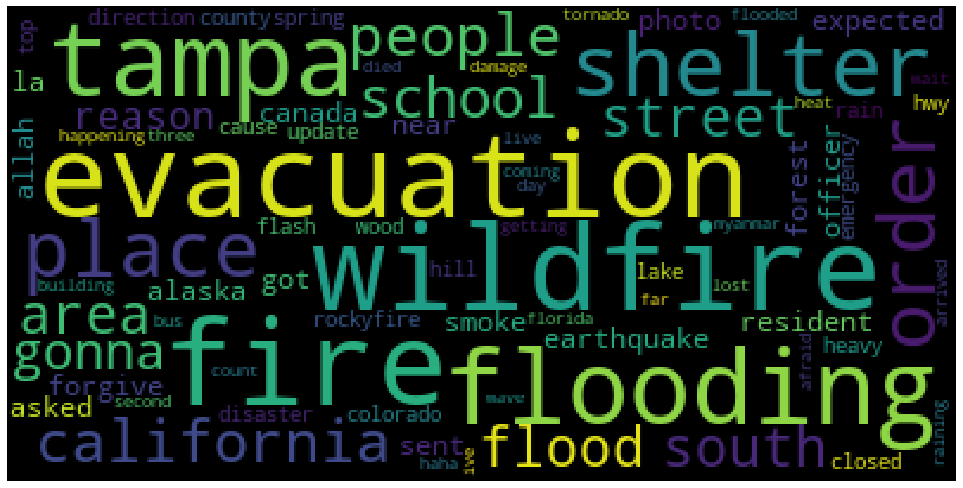

In [23]:
plt.figure(figsize=(17,15))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 50
                         ).generate(" ".join(corpus_new1[:100]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [24]:
corpus_new0=create_corpus_df(df,0)
len(corpus_new0)

25957

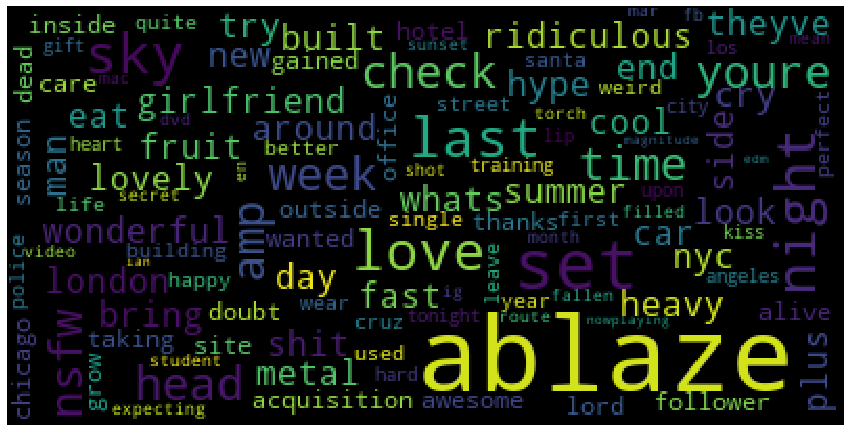

In [25]:
plt.figure(figsize=(15,10))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 50
                         ).generate(" ".join(corpus_new0[:150]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

## Count Vectorizer

In [33]:
def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = df["text"].tolist()
list_labels = df["target"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

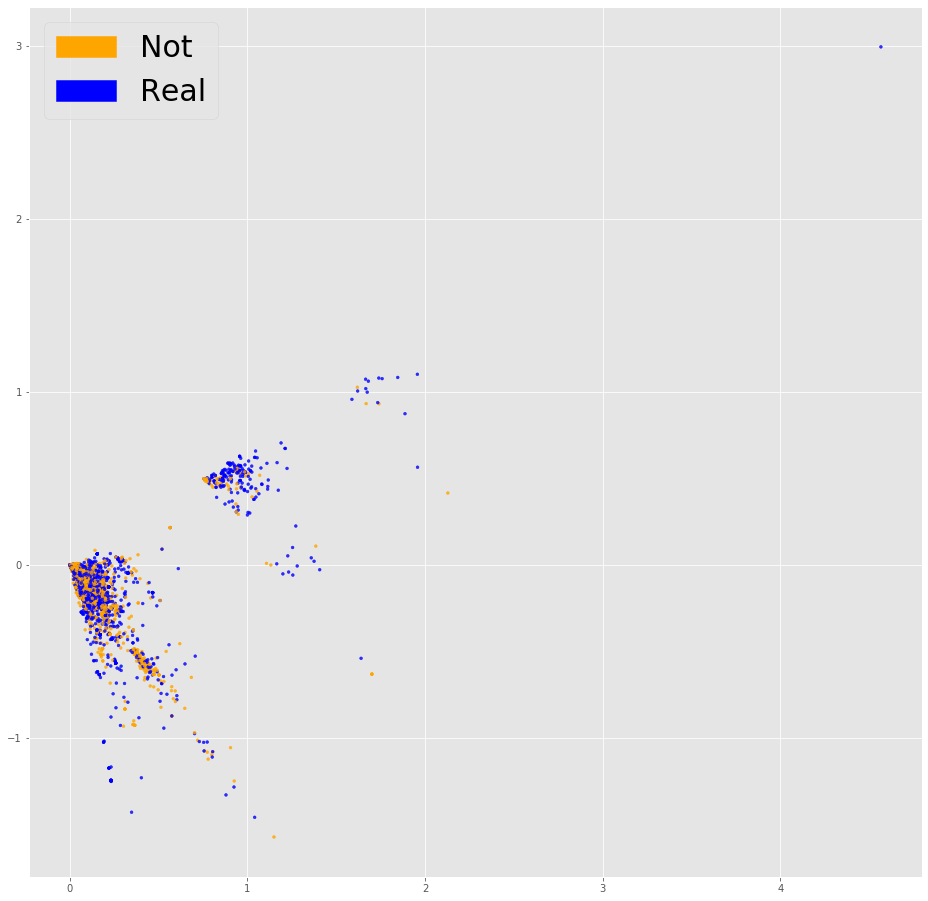

In [34]:
def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            orange_patch = mpatches.Patch(color='orange', label='Not')
            blue_patch = mpatches.Patch(color='blue', label='Real')
            plt.legend(handles=[orange_patch, blue_patch], prop={'size': 30})

fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)
plt.show()

## GLOVE

In [35]:
def create_corpus_new(df):
    corpus=[]
    for tweet in tqdm(df['text']):
        words=[word.lower() for word in word_tokenize(tweet)]
        corpus.append(words)
    return corpus

In [36]:
corpus=create_corpus_new(df)

100%|█████████████████████████████████████████████████████████████████████████| 10876/10876 [00:00<00:00, 13838.95it/s]


In [38]:
embedding_dict={}
with open(r'C:\Users\vaibhav.maheshwari\Downloads\glove.6B\glove.6B.100d.txt','r', encoding="utf8") as f:
    for line in f:
        values=line.split()
        word = values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [41]:
MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [42]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 3825


In [43]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i < num_words:
        emb_vec=embedding_dict.get(word)
        if emb_vec is not None:
            embedding_matrix[i]=emb_vec

100%|██████████████████████████████████████████████████████████████████████████| 3825/3825 [00:00<00:00, 477874.80it/s]


In [44]:
tweet_pad[0][0:]

array([ 414,  131, 1613, 3196,    7,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

In [45]:

model=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


optimzer=Adam(learning_rate=3e-4)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 100)           382600    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 50, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 463,101
Trainable params: 80,501
Non-trainable params: 382,600
_________________________________________________________________


In [48]:

train=tweet_pad[:tweet.shape[0]]
test=tweet_pad[tweet.shape[0]:]

In [49]:

X_train,X_test,y_train,y_test=train_test_split(train,tweet['target'].values,test_size=0.2)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_test.shape)

Shape of train (6090, 50)
Shape of Validation  (1523, 50)


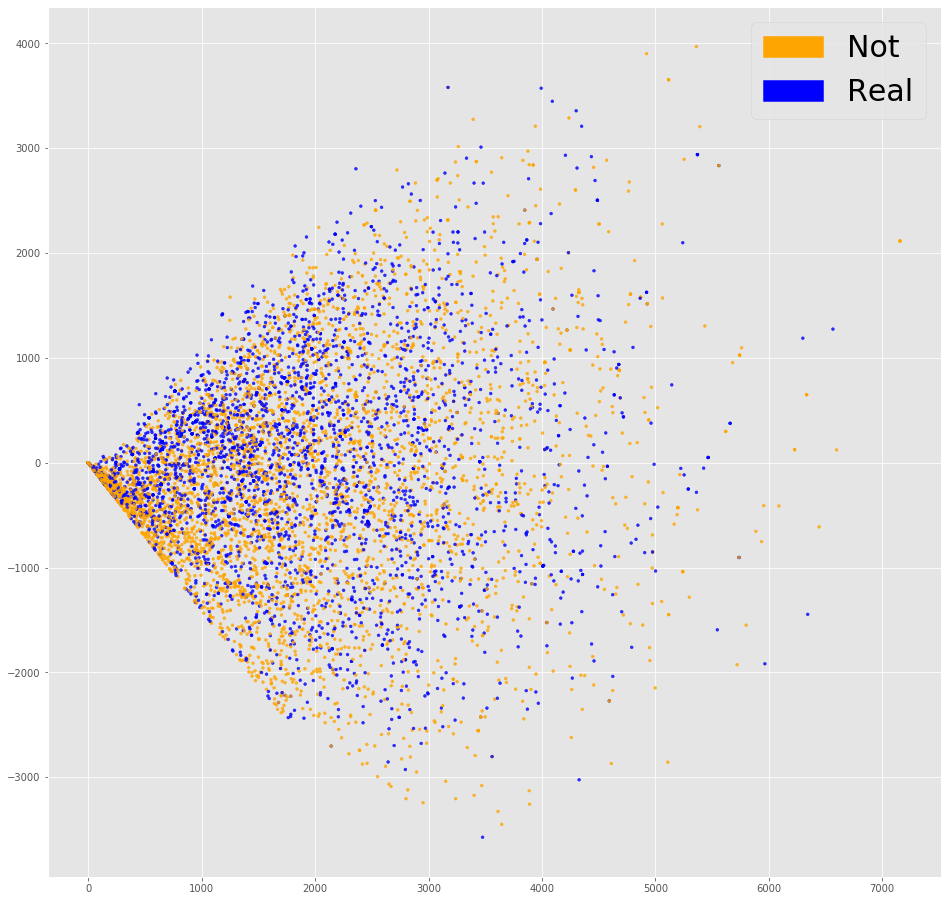

In [50]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(train,tweet['target'])
plt.show()

In [51]:
history=model.fit(X_train,y_train,batch_size=4,epochs=15,validation_data=(X_test,y_test),verbose=2)

Train on 6090 samples, validate on 1523 samples
Epoch 1/15
 - 20s - loss: 0.5782 - accuracy: 0.7151 - val_loss: 0.5419 - val_accuracy: 0.7518
Epoch 2/15
 - 20s - loss: 0.5389 - accuracy: 0.7537 - val_loss: 0.4843 - val_accuracy: 0.7781
Epoch 3/15
 - 20s - loss: 0.5332 - accuracy: 0.7558 - val_loss: 0.5365 - val_accuracy: 0.7682
Epoch 4/15
 - 20s - loss: 0.5349 - accuracy: 0.7616 - val_loss: 0.5237 - val_accuracy: 0.7807
Epoch 5/15
 - 20s - loss: 0.5385 - accuracy: 0.7609 - val_loss: 0.5242 - val_accuracy: 0.7814
Epoch 6/15
 - 23s - loss: 0.5313 - accuracy: 0.7522 - val_loss: 0.4834 - val_accuracy: 0.7951
Epoch 7/15
 - 23s - loss: 0.5120 - accuracy: 0.7693 - val_loss: 0.4828 - val_accuracy: 0.8024
Epoch 8/15
 - 23s - loss: 0.5074 - accuracy: 0.7695 - val_loss: 0.4763 - val_accuracy: 0.7997
Epoch 9/15
 - 24s - loss: 0.5034 - accuracy: 0.7737 - val_loss: 0.4654 - val_accuracy: 0.7899
Epoch 10/15
 - 23s - loss: 0.5005 - accuracy: 0.7785 - val_loss: 0.4662 - val_accuracy: 0.7971
Epoch 11/15

In [52]:
train_pred_GloVe = model.predict(train)
train_pred_GloVe_int = train_pred_GloVe.round().astype('int')

## BERT

In [57]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub

import tokenization

In [58]:
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [59]:
def build_model(bert_layer, max_len=512):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    _, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]
    
    if Dropout_num == 0:
        # Without Dropout
        out = Dense(1, activation='sigmoid')(clf_output)
    else:
        # With Dropout(Dropout_num), Dropout_num > 0
        x = Dropout(Dropout_num)(clf_output)
        out = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(Adam(lr=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [60]:
# Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
def clean_tweets(tweet):
    """Removes links and non-ASCII characters"""
    
    tweet = ''.join([x for x in tweet if x in string.printable])
    
    # Removing URLs
    tweet = re.sub(r"http\S+", "", tweet)
    
    return tweet

In [61]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [62]:
def remove_punctuations(text):
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    
    for p in punctuations:
        text = text.replace(p, f' {p} ')

    text = text.replace('...', ' ... ')
    
    if '...' not in text:
        text = text.replace('..', ' ... ')
    
    return text

In [63]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [64]:
def convert_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

In [65]:
def convert_abbrev_in_text(text):
    tokens = word_tokenize(text)
    tokens = [convert_abbrev(word) for word in tokens]
    text = ' '.join(tokens)
    return text

In [66]:
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1"
bert_layer = hub.KerasLayer(module_url, trainable=True)

In [67]:
train = pd.read_csv("train.csv") 
test = pd.read_csv("test.csv")

In [72]:

Dropout_num = 0
learning_rate = 3e-6
valid = 0.2
epochs_num = 3
batch_size_num = 16
target_corrected = True
target_big_corrected = False

In [70]:
if target_corrected:
    ids_with_target_error = [328,443,513,2619,3640,3900,4342,5781,6552,6554,6570,6701,6702,6729,6861,7226]
    train.loc[train['id'].isin(ids_with_target_error),'target'] = 0
    train[train['id'].isin(ids_with_target_error)]

In [73]:
if target_big_corrected:
    train["text"] = train["text"].apply(lambda x: clean_tweets(x))
    test["text"] = test["text"].apply(lambda x: clean_tweets(x))
    
    train["text"] = train["text"].apply(lambda x: remove_emoji(x))
    test["text"] = test["text"].apply(lambda x: remove_emoji(x))
    
    train["text"] = train["text"].apply(lambda x: remove_punctuations(x))
    test["text"] = test["text"].apply(lambda x: remove_punctuations(x))
    
    train["text"] = train["text"].apply(lambda x: convert_abbrev_in_text(x))
    test["text"] = test["text"].apply(lambda x: convert_abbrev_in_text(x))

In [75]:
from bert import tokenization

In [81]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

AttributeError: module 'tensorflow' has no attribute 'gfile'

In [ ]:
train_input = bert_encode(train.text.values, tokenizer, max_len=160)
test_input = bert_encode(test.text.values, tokenizer, max_len=160)
train_labels = train.target.values

In [ ]:
model_BERT = build_model(bert_layer, max_len=160)
model_BERT.summary()

In [ ]:
checkpoint = ModelCheckpoint('model_BERT.h5', monitor='val_loss', save_best_only=True)

train_history = model_BERT.fit(
    train_input, train_labels,
    validation_split = valid,
    epochs = epochs_num, # recomended 3-5 epochs
    callbacks=[checkpoint],
    batch_size = batch_size_num
)

## Basic training 

In [3]:
train_df[train_df["target"] == 0]["text"].values[1]

'I love fruits'

In [5]:
count_vectorizer = feature_extraction.text.CountVectorizer()

## let's get counts for the first 5 tweets in the df
example_train_vectors = count_vectorizer.fit_transform(train_df["text"][0:5])

In [6]:
## we use .todense() here because these vectors are "sparse" (only non-zero elements are kept to save space)
print(example_train_vectors[0].todense().shape)
print(example_train_vectors[0].todense())

(1, 54)
[[0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0]]


In [7]:
train_vectors = count_vectorizer.fit_transform(train_df["text"])

## note that we're NOT using .fit_transform() here. Using just .transform() makes sure
# that the tokens in the train vectors are the only ones mapped to the test vectors - 
# i.e. that the train and test vectors use the same set of tokens.
test_vectors = count_vectorizer.transform(test_df["text"])

In [8]:
## Our vectors are really big, so we want to push our model's weights
## toward 0 without completely discounting different words - ridge regression 
## is a good way to do this.
clf = linear_model.RidgeClassifier()

In [9]:
scores = model_selection.cross_val_score(clf, train_vectors, train_df["target"], cv=3, scoring="f1")
scores

array([0.60355649, 0.57484457, 0.64485082])

In [10]:
clf.fit(train_vectors, train_df["target"])

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)

In [11]:
sample_submission = pd.read_csv("sample_submission.csv")

In [12]:
sample_submission["target"] = clf.predict(test_vectors)

In [13]:
sample_submission.head()

id  target
0   0       0
1   2       1
2   3       1
3   9       0
4  11       1

In [ ]:
sample_submission.to_csv("submission.csv", index=False)

In [8]:
import pandas as pd
import os

# folder = 'aclImdb'
labels = {'pos': 1, 'neg': 0}
df = pd.DataFrame()
for f in ('test', 'train'):    
    for l in ('pos', 'neg'):
        path = r'C:\Users\vaibhav.maheshwari\Downloads\aclImdb'
        for file in os.listdir (path) :
            with open(os.path.join(path, file),'r', encoding='utf-8') as infile:
                txt = infile.read()
            df = df.append([[txt, labels[l]]],ignore_index=True)
df.columns = ['review', 'sentiment']

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\vaibhav.maheshwari\\Downloads\\aclImdb\\test'

In [34]:
import nltk
from nltk.tokenize import word_tokenize

reviews = df.text.str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(reviews)
vocabulary = set(tokens)

print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

3825


['fire',
 'amp',
 'new',
 'news',
 'people',
 'time',
 'u',
 'video',
 'emergency',
 'disaster',
 'year',
 'would',
 'body',
 'police',
 'building',
 'day',
 'life',
 'home',
 'storm',
 'family',
 'attack',
 'got',
 'suicide',
 'crash',
 'first',
 'burning',
 'flood',
 'bomb',
 'back',
 'world',
 'look',
 'california',
 'car',
 'make',
 'death',
 'train',
 'love',
 'going',
 'man',
 'today',
 'nuclear',
 'hiroshima',
 'full',
 'service',
 'need',
 'watch',
 'dead',
 'youtube',
 'woman',
 'accident']

In [26]:
X_train = df['text'][(df['target'] == 1) | (df['target'] == 0)]
y_train = df['target'][(df['target'] == 1) | (df['target'] == 0)]


In [31]:
X_test = df['text'][(df['target']!= 1) | (df['target']!= 0)]
y_test = df['target'][(df['target']!= 1) | (df['target']!= 0)]

In [32]:
len(X_test)

10876

In [73]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(7613, 3797) (10876, 3797)


In [74]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

In [75]:
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').